In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [129]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#  Cleaning and Preprocessing

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [131]:
df[df.duplicated()].sum()

Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
dtype: float64

In [132]:
df.Genre

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9827, dtype: object

In [133]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Cleaning information

1. Release_Date datatype is object
2. Drop Poster_Url, Overview, Original_language Columns
3. Blank spaces in Genre Column
4. Convert Vote_avg to categorical column


In [134]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [135]:
df['Release_Date'] = df['Release_Date'].dt.year

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int64  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 691.1+ KB


Release_Date converted to Year 

In [137]:
cols = ['Overview','Original_Language', 'Poster_Url']

In [138]:
df.drop(cols, axis = 1, inplace = True)

In [139]:
df.head(5)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Dropped unnecessary columns

<AxesSubplot: xlabel='Vote_Average', ylabel='Count'>

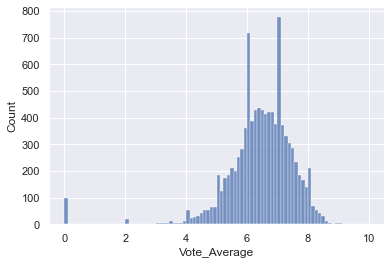

In [140]:
sns.histplot(df['Vote_Average'])

Converting these values into popular, avg, below avg, not popular

In [141]:
def convert(vote):
    if vote >= 8.0:
        return 'Popular'
    elif vote > 6.0:
        return 'Avg'
    elif vote > 4.0:
        return 'Below_Avg'
    else :
        return 'Not_Popular'

In [142]:
df['Vote_Average'] = df['Vote_Average'].apply(convert)

In [143]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Avg,Thriller
3,2021,Encanto,2402.201,5076,Avg,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Avg,"Action, Adventure, Thriller, War"


In [144]:
df.Vote_Average.value_counts()

Avg            6481
Below_Avg      2705
Popular         436
Not_Popular     205
Name: Vote_Average, dtype: int64

Vote_Average converted into Categorical Column

In [145]:
df.Vote_Average.unique()

array(['Popular', 'Avg', 'Below_Avg', 'Not_Popular'], dtype=object)

In [146]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,Avg,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Avg,History
25790,1984,Threads,13.354,186,Avg,War
25791,1984,Threads,13.354,186,Avg,Drama


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  25793 non-null  int64  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Vote_Count    25793 non-null  int64  
 4   Vote_Average  25793 non-null  object 
 5   Genre         25793 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.2+ MB


# Finding Trends using Visualization

#### 1. Distribution of Popularity

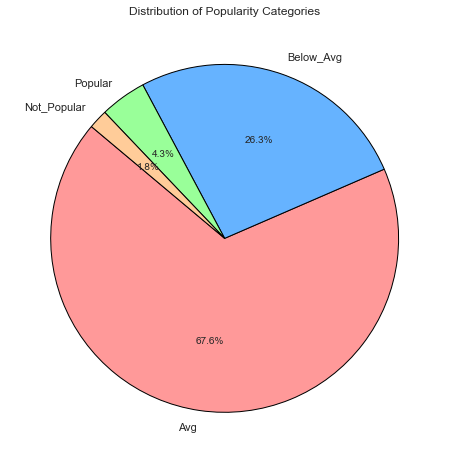

In [167]:
plt.figure(figsize=(8, 8))
plt.pie(df['Vote_Average'].value_counts(), labels=popularity_counts.index, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Popularity Categories")
plt.show()

Most Netflix movies have average popularity (67.6%), while a significant number are below average (26.3%). Only a small percentage (4.3%) are highly popular, and very few (1.8%) are not popular at all. This shows that most films get moderate attention, but only a few become big hits.

#### 2. Year with most films released

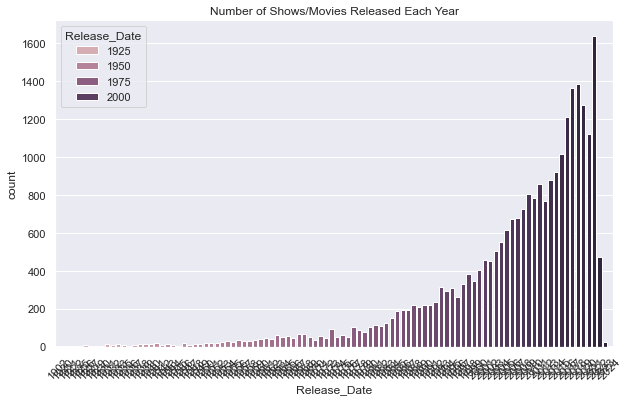

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Release_Date", data=df, hue = "Release_Date", order=sorted(df["Release_Date"].unique()))
plt.title("Number of Shows/Movies Released Each Year")`
plt.xticks(rotation=45)
plt.show()

In [147]:
df['Release_Date'].value_counts().sort_values(ascending = False).head(1)

2021    1638
Name: Release_Date, dtype: int64

#### 3. Most films made on specific Genre

In [111]:
df['Genre'].value_counts()`

Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1439
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: Genre, dtype: int64

C:\Users\Yash Mahajan\AppData\Local\Temp\ipykernel_13200\3481694672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = 'Genre',order=df['Genre'].value_counts().index,palette="magma" )


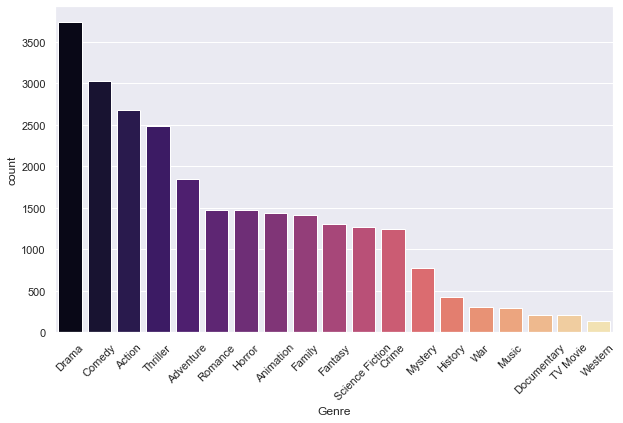

In [148]:
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x = 'Genre',order=df['Genre'].value_counts().index,palette="magma" )
plt.xticks(rotation=45)
plt.show()

#### 4. Genre with highest vote

In [149]:
highestvote = df.groupby('Genre')['Vote_Count'].sum().reset_index().sort_values(by = 'Vote_Count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

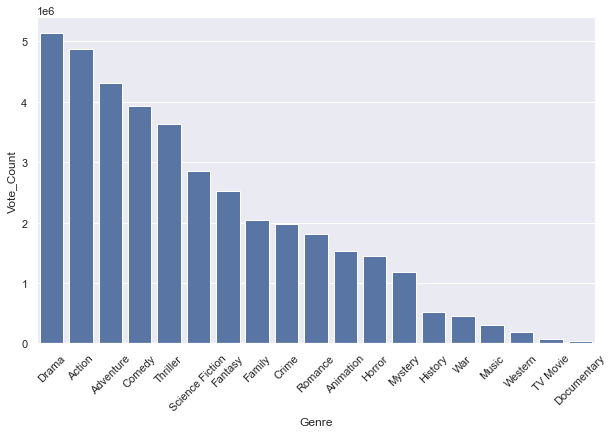

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(data = highestvote, x='Genre', y = 'Vote_Count' )
plt.xticks(rotation=45)
plt.show

#### 5. Film With highest Popularity

In [153]:
df.sort_values(by = 'Popularity' , ascending = False).head(1)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action


#### 6. Film With lowest Popularity

In [160]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Avg,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Avg,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Avg,History
25790,1984,Threads,13.354,186,Avg,War
25791,1984,Threads,13.354,186,Avg,Drama
25792,1984,Threads,13.354,186,Avg,Science Fiction


## Conclusion
#### 1. Distribution of Popularity
Most Netflix movies have average popularity (67.6%), while a significant number are below average (26.3%). Only a small percentage (4.3%) are highly popular, and very few (1.8%) are not popular at all. This shows that most films get moderate attention, but only a few become big hits.

#### 2. Year with most films releases
The highest number of films were released in 2021, with a total of 1,638. This suggests a peak in Netflix's content production, possibly influenced by post-pandemic content releases.

#### 3. Most Common Movie Genres
Drama was the most frequently produced genre, followed by Comedy and Action. This aligns with audience preferences, as these genres tend to attract a broad viewership.

#### 4. Genre with highest total votes
Drama also received the highest total votes, indicating strong audience engagement. This suggests that people not only watch but actively rate and discuss dramatic films.

#### 5. Film With highest Popularity
Spider-Man: No Way Home had the highest popularity, likely due to its massive fanbase, franchise appeal, and extensive marketing.

#### 6. Film With lowest Popularity
The United States vs. Billie Holiday and Threads had the least popularity, possibly due to their niche appeal or limited promotion.